In [26]:
# <!-- collapse=True -->
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Spline

In [37]:
from scipy.interpolate import LSQUnivariateSpline as Spline

In [38]:
def get_model( Xm, Ym,  n=10 ):
    # n = 10 , nombre de points 
    t = np.linspace( 0, 1, n )[1:-1]
    S = Spline( Xm, Ym, t, w=None, bbox=[None, None], k=2, ext=0, check_finite=False)
    return S

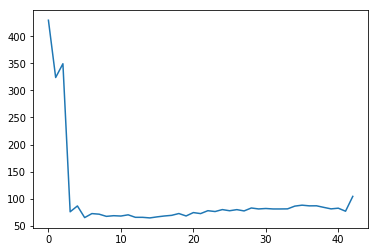

In [40]:
Xa, Ya = X[0::2], Y[0::2]
Xt, Yt = X[1::2], Y[1::2]

allE=[]
for i in range(2, 45):
    S = get_model( Xa, Ya, n=i )
    E = np.sum( ( Yt - S(Xt) )**2 )
    allE.append(E)
    
plt.plot(allE);

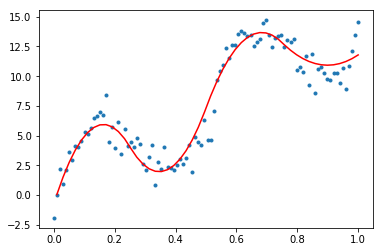

In [41]:
S = get_model( Xa, Ya, n=5 )
plt.plot( X, Y, "." );
plt.plot( Xt, S( Xt ), "-r" );

## Avec plusieurs fréquences

Sur des données réelles, et à tendances fractales

In [48]:
data = np.load('./timeseriesdata.npy', encoding='bytes').item()
X, Y = data['DEXUSEU.csv']

X = (X-min(X))/(max(X)-min(X)) # Pour les splines

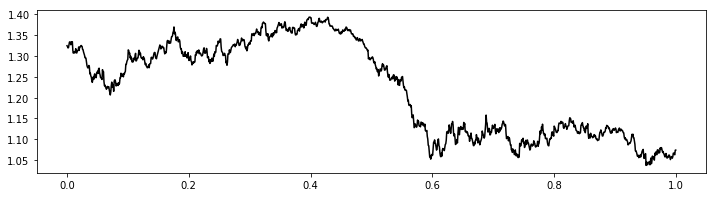

In [49]:
plt.figure(figsize=(12, 3))
plt.plot( X, Y, "k-" );

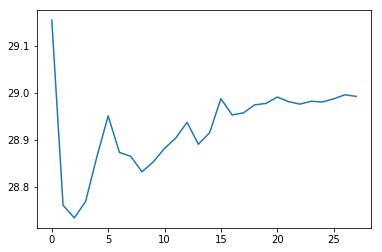

In [54]:
# Choix des ensemble d'apprentissage, et de test(validation)

# une valeur sur deux:
Xa, Ya = X[0::2], Y[0::2]
Xt, Yt = X[1::2], Y[1::2]

# ou bien gauche/droite:
m = int( len(X)/2 )
Xa, Ya = X[0:m], Y[0:m]
Xt, Yt = X[m:], Y[m:]

Xa = (Xa-min(Xa))/(max(Xa)-min(Xa)) # Pour les splines
Xt = (Xt-min(Xt))/(max(Xt)-min(Xt)) # Pour les splines


allE=[]
for i in range(2, 30):
    S = get_model( Xa, Ya, n=i )
    E = np.sum( ( Yt - S(Xt) )**2 )
    allE.append(E)
    
plt.plot(allE)

pas des plus convaincant comme minimum...

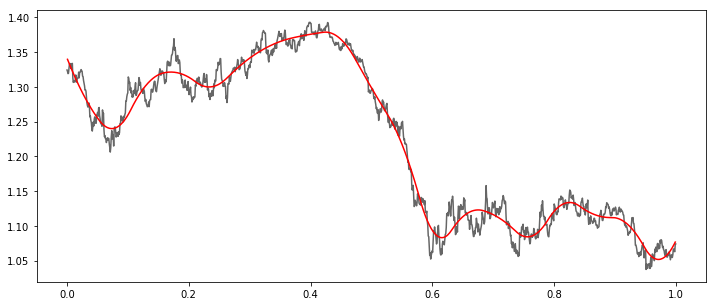

In [47]:
S = get_model( Xa, Ya, n=20 )
plt.figure(figsize=(12, 5))
plt.plot( X, Y, "k-", alpha=.6 );
plt.plot( Xt, S( Xt ), "-r" );

et pourquoi pas faire le spilt à la moitié ? plutôt qu'une valeur sur deux 

anyway...validation vs Cross-validation